## Question 1: Use the yfinance to Extract Stock Data

In [2]:
import yfinance as yf

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

In [ ]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.

In [3]:
tesla_data = tesla.history(period="max")

Reset the index, save, and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results.

In [4]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping


We will scrape the Tesla revenue data using the `BeautifulSoup` and `requests` libraries. The data source is a webpage containing Tesla's quarterly revenue.


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
print(f"Number of tables found: {len(tables)}")

Number of tables found: 0


Locate the revenue table in the HTML content and extract Tesla's quarterly revenue. Store it in a pandas dataframe `tesla_revenue`.


In [15]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("table")[1].tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

Display the first five rows of the `tesla_revenue` dataframe.


In [25]:
tesla_revenue.head()

,Date,Revenue
0,2024-12-31,25707
1,2024-09-30,25182
2,2024-06-30,25500
3,2024-03-31,21301
4,2023-12-31,25167


## Question 3 - Extracting GameStop Stock Data Using `yfinance`

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `GME`.

In [31]:
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.

In [32]:
gme_data = gme.history(period="max")

Reset the index, save, and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results.

In [33]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping


We will scrape the GAmeStop revenue data using the `BeautifulSoup` and `requests` libraries. The data source is a webpage containing GameStop's quarterly revenue.


In [34]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

Locate the revenue table in the HTML content and extract Tesla's quarterly revenue. Store it in a pandas dataframe `gme_revenue`.


In [36]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("table")[1].tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

Display the first five rows of the `gme_revenue` dataframe.


In [39]:
gme_revenue.head()

,Date,Revenue
0,2025-01-31,1283
1,2024-10-31,860
2,2024-07-31,798
3,2024-04-30,882
4,2024-01-31,1794


## Question 5 - Tesla Stock and Revenue Dashboard

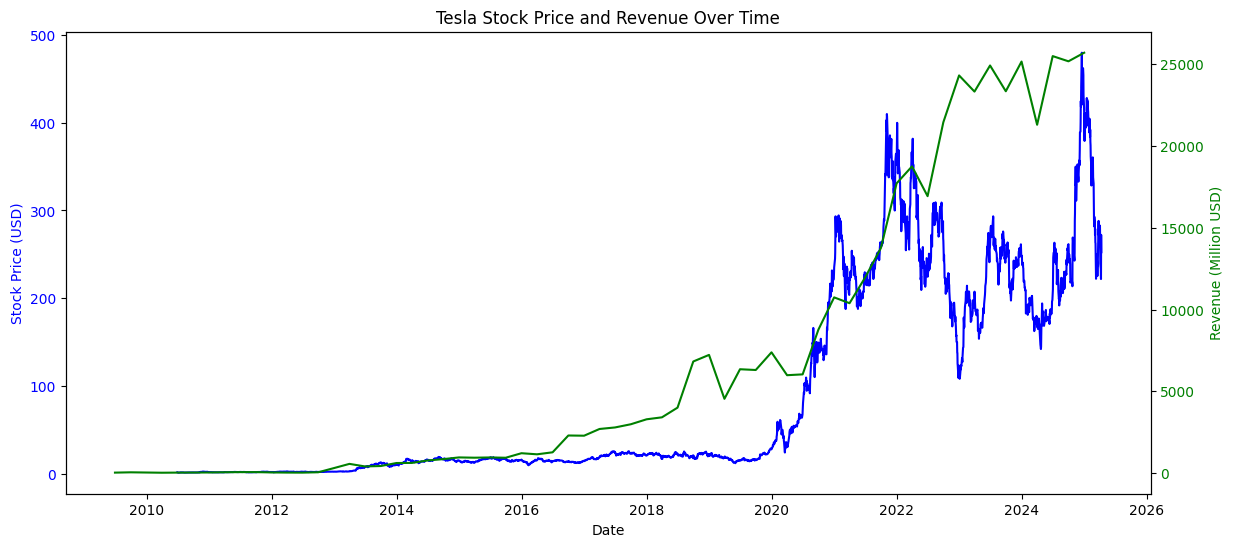

In [47]:
# Import required libraries
import matplotlib.pyplot as plt

# Convert 'Date' columns to datetime
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Set figure size
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Tesla stock price
ax1.plot(tesla_data['Date'], tesla_data['Close'], color='blue', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Tesla Stock Price and Revenue Over Time')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'].astype(float), color='green', label='Revenue')
ax2.set_ylabel('Revenue (Million USD)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show plot
plt.show()


## Question 6 - GameStop Stock and Revenue Dashboard

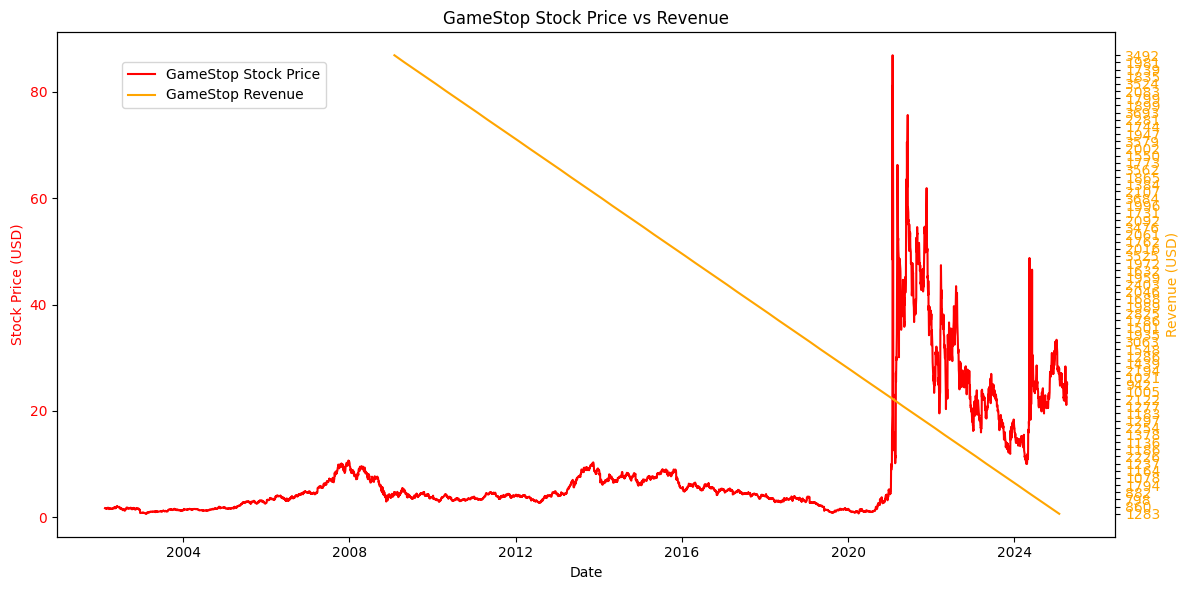

In [53]:
# Convert date columns to datetime if not already
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GameStop stock price
ax1.plot(gme_data['Date'], gme_data['Close'], color='red', label='GameStop Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (USD)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for revenue
ax2 = ax1.twinx()
ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='orange', label='GameStop Revenue')
ax2.set_ylabel('Revenue (USD)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set title and legends
plt.title('GameStop Stock Price vs Revenue')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show plot
plt.show()
